In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 解題步驟：

1. 讀取 titanic.csv
2. 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')
3. 分析缺失值，練習繪製直方圖(如下圖二)
4. 分別以平均值及眾數填補
5. 將剩下是字串的欄位轉為數值(Age and Embarked)
6. 將資料切分為訓練及測試集
7. 輸入隨機森林訓練並測試模型在訓練及測試集上的準確度

#### 圖一
<img src="./data/hw_04/titanic.png" style="zoom:30%;" />

#### 圖二
<img src="./data/hw_04/hist.png" style="zoom:100%;" />

## 讀取資料

In [2]:
""" Your code here: 讀取 titanic.csv """
df = pd.read_csv('./data/hw_04/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')

In [3]:
""" Your code here: """
df_drop = df.copy()
df_drop.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace = True)

df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## 填補缺失值
1. Discrete: 繪製圖表以判斷該如何填補
2. Continual: 使用平均值或中位數
3. 若缺失值過多則刪除

Age         177
Embarked      2
dtype: int64


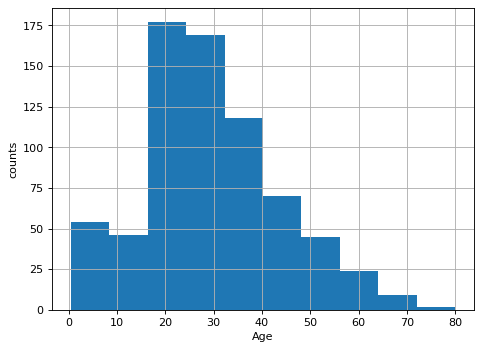

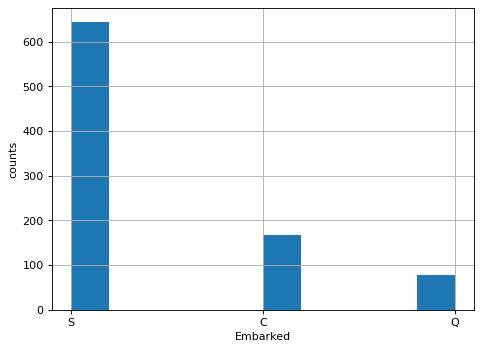

In [5]:
""" Your code here: """
missing = df_drop.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending = False)
print(missing)


plt.figure(figsize = (15, 5), dpi = 80)
plt.subplot(1, 2, 1)
df_drop.Age.hist()
plt.ylabel("counts")
plt.xlabel("Age")  
plt.show()

plt.figure(figsize = (15, 5), dpi = 80)
plt.subplot(1, 2, 2)
df_drop.Embarked.hist()
plt.ylabel("counts")
plt.xlabel("Embarked") 
plt.show()


df_drop.Age.fillna(df_drop.Age.mean(), inplace = True)
df_drop.Embarked.fillna(df_drop.Embarked.mode()[0], inplace = True)

## Feature transformation(Sex and Embarked)
- Label encoding
- One-hot encoding

In [6]:
""" Your code here: """
# Label encoding
le = LabelEncoder()
df_drop.Sex	 = le.fit_transform(df_drop.Sex)

# One-hot encoding
df_dummy = pd.get_dummies(df_drop.Embarked, prefix="Embarked_", drop_first = True)

df_drop = pd.concat([df_drop, df_dummy], axis=1)
df_drop.drop(columns = ['Embarked'], inplace = True)

df_drop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__Q,Embarked__S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


## 切分訓練集及測試集

In [7]:
""" Your code here: """

split_idx = round(df_drop.shape[0]*4/5)
target = 'Survived'

Train = df_drop[: split_idx]
Test = df_drop[split_idx: ]

y_train = np.asarray(Train[target], dtype = np.float64)
x_train = np.asarray(Train.drop(columns = [target]))

y_test = np.asarray(Test[target], dtype = np.float64)
x_test = np.asarray(Test.drop(columns = [target]))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(713, 8) (713,) (178, 8) (178,)


## Training

In [8]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

## Evaluation

In [9]:
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       434
         1.0       0.99      0.97      0.98       279

    accuracy                           0.98       713
   macro avg       0.98      0.98      0.98       713
weighted avg       0.98      0.98      0.98       713


Testing report
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       115
         1.0       0.75      0.79      0.77        63

    accuracy                           0.83       178
   macro avg       0.81      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178

